In [1]:
#
# Generate data for Example 9.4 in the book 
# Chemical Reactor Analysis and Design Fundamentals - Rawlings and Ekerdt
#
# Code from book at
# https://sites.engineering.ucsb.edu/~jbraw/chemreacfun/fig-html/ch9/fig-9-21.html
#

In [31]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
def rxnrate(t, c, kac, nac):
    dc = -kac * c ** nac
    return dc

In [17]:
kac = 0.5
nac = 2.5
ca0ac = 2 

tfinal = 5
nts = 100
tout = np.linspace(0, tfinal, nts)

In [18]:
rxnrate2 = lambda t, c: rxnrate(t, c, kac, nac)
sol = solve_ivp(rxnrate2, [0, tfinal], [ca0ac], t_eval = tout)

In [26]:
# measurement noise
measvar = 1e-2
measstddev = np.sqrt(measvar)
noise = measstddev * np.random.randn(nts)

ymeas = sol.y.T + noise.reshape(nts, 1)

Text(0, 0.5, 'ca')

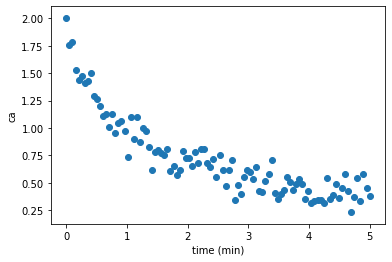

In [29]:
plt.scatter(sol.t, ymeas)
plt.xlabel('time (min)')
plt.ylabel('ca')

In [33]:
ex_9_4_data = pd.DataFrame({'t': sol.t, 'ca_meas': ymeas.reshape(nts,)})
ex_9_4_data

,t,ca_meas
0,0.000000,2.005422
1,0.050505,1.753623
2,0.101010,1.788886
3,0.151515,1.532534
4,0.202020,1.438015
...,...,...
95,4.797980,0.548124
96,4.848485,0.338334
97,4.898990,0.582398
98,4.949495,0.451629


In [34]:
ex_9_4_data.to_csv('ex_9_4_data.csv', index = False)